Foram selecionados para análises de suas correlações, os bancos de dados “High-technology exports (% of manufactured exports)” e “Renewable energy consumption (% of total final energy consumption)”, publicados pelo World Bank, a fim de testar a hipótese levantada de que países mais desenvolvidos, e que contribuem mais com exportações de alta tecnologia para o mundo, estão mais preocupados e levando mais a sério as questões climáticas do que aqueles que não estão nesse grupo.

Primeiramente, países que contribuem mais com exportações de alta tecnologia para a sociedade tendem a ser os países mais desenvolvidos, possuindo bons índices econômicos e relevância no cenário mundial, enquanto aqueles que não estão inclusos nesse grupo, possuem muitas vezes problemas que julgam ser mais sérios e urgentes do que as mudanças climáticas. Por conta disso os países mais pobres ou que não possuem tanta importância tecnológica e econômica não se preocupam em tomar medidas a fim de reduzir as emissões de gases poluentes para a atmosfera, diferente daqueles mais ricos e influentes.

Em contraposição, foram obtidos resultados inesperados ao calcular a correlação desses indicadores, demonstrando, aparentemente, uma correlação não tão clara ou então inexistente à primeira vista. Portanto, a hipótese levantada não foi observada durante a visualização dos dados, o que permitiu o levantamento de uma nova teoria de que, devido as pressões externas de países mais ricos e poderosos, os mais pobres também buscam um desenvolvimento mais sustentável a fim de receber investimentos estrangeiros e não sofrer sanções dos demais.


PLOT DO GRÁFICO

Primeiro importamos as bibliotecas e lemos os bancos de dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_exports = pd.read_csv('dados/high_technology_exports.csv', skiprows=4)
df_energia = pd.read_csv('dados/consumption_total_renewable_electricity.csv', skiprows=4)

Com o ambiente preparado, filtramos os países que utilizaremos em nossas análises (Brasil, Argentina e Islândia).

In [2]:
iceland = df_energia['Country Name'] == 'Iceland'
df_iceland_energia = df_energia.loc[iceland]
df_iceland_export = df_exports.loc[iceland]

brazil = df_energia['Country Name'] == 'Brazil'
df_brazil_energia = df_energia.loc[brazil]
df_brazil_export = df_exports.loc[brazil]

argentina = df_energia['Country Name'] == 'Argentina'
df_argentina_energia = df_energia.loc[argentina]
df_argentina_export = df_exports.loc[argentina]

Criamos listas dos indicadores por país com os valores de cada ano para plotarmos no nosso gráfico.

In [3]:
argentina_energia = []
argentina_export = []
brazil_energia = []
brazil_exports = []
iceland_energia = []
iceland_exports = []

anos = list(range(2008, 2022))
for ano in range(2008,2022):
    argentina_energia.append(df_argentina_energia[str(ano)])
    argentina_export.append(df_argentina_export[str(ano)])
    brazil_energia.append(df_brazil_energia[str(ano)])
    brazil_exports.append(df_brazil_export[str(ano)])
    iceland_energia.append(df_iceland_energia[str(ano)])
    iceland_exports.append(df_iceland_export[str(ano)])


Por fim, criamos a figura com cores especifícas para cada país, sendo duas linhas para cada, uma contínua que indica a taxa de consumo de energia renovável do país e outra tracejada que indica taxa de exportação de alta tecnologia.

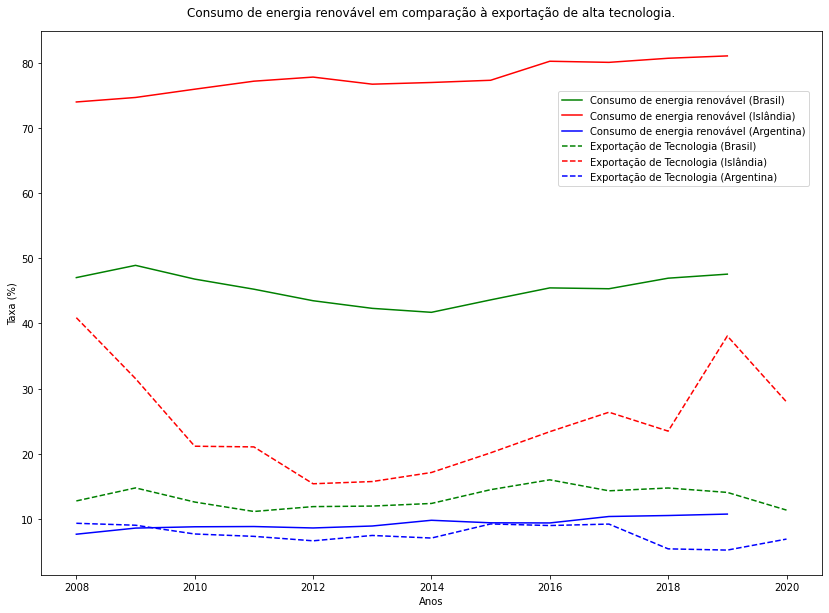

In [4]:
plt.figure(figsize=(14,10))
plt.plot(anos, brazil_energia, color='g',label='Consumo de energia renovável (Brasil)')
plt.plot(anos, iceland_energia, color='r', label='Consumo de energia renovável (Islândia)')
plt.plot(anos, argentina_energia, color='b', label='Consumo de energia renovável (Argentina)')

plt.plot(anos, brazil_exports, color='g', linestyle='dashed',label='Exportação de Tecnologia (Brasil)')
plt.plot(anos, iceland_exports, color='r', linestyle='dashed', label='Exportação de Tecnologia (Islândia)')
plt.plot(anos, argentina_export, color='b', linestyle='dashed', label='Exportação de Tecnologia (Argentina)')

plt.title('Consumo de energia renovável em comparação à exportação de alta tecnologia.', pad=15)
plt.xlabel('Anos')
plt.ylabel('Taxa (%)')
plt.legend(loc =1, bbox_to_anchor=(0.99,0.9))
plt.show()


CÁLCULOS DA COVARIÂNCIA E CORRELAÇÃO

Primeiramente inicializamos e lemos os dados

In [5]:
df_energia = pd.read_csv('dados\consumption_total_renewable_electricity.csv', skiprows=3)
df_tech = pd.read_csv('dados\high_technology_exports.csv', skiprows=3)

df_energia = df_energia.set_index('Country Name')
df_tech = df_tech.set_index('Country Name')


Definimos funções que nos auxiliariam na construção dos dataframes e na criação das listas

In [6]:
def faz_lista_energia(nome_do_pais):
    lista = []
    for ano in list(range(2008,2022)):    
        df = df_energia[str(ano)]
        num = df.loc[nome_do_pais]
        lista.append(num)
    return lista

def faz_lista_tech(nome_do_pais):
    lista = []
    for ano in list(range(2008,2022)):    
        df = df_tech[str(ano)]
        num = df.loc[nome_do_pais]
        lista.append(num)
    return lista

def cria_df(lista_energia, lista_tech):
    df = pd.DataFrame([lista_energia, lista_tech])
    df = df.transpose()
    df.columns=['Energia',"Tecnologia"]
    return df


Criamos as listas e dataframes

In [7]:
energia_brasil = faz_lista_energia('Brazil')
energia_argentina = faz_lista_energia('Argentina')
energia_islandia = faz_lista_energia('Iceland')
tech_brasil = faz_lista_tech('Brazil')
tech_argentina = faz_lista_tech('Argentina')
tech_islandia = faz_lista_tech('Iceland')


df_brasil = cria_df(energia_brasil,tech_brasil)
df_argentina = cria_df(energia_argentina,tech_argentina)
df_islandia = cria_df(energia_islandia,tech_islandia)

Para finalizar, utilizamos os médotos do python para demonstrar na tela as correlações e as covariâncias.

In [8]:
#Correlação no Brasil
df_brasil.corr()

,Energia,Tecnologia
Energia,1.000000,0.431516
Tecnologia,0.431516,1.000000


In [9]:
#Correlação da Argentina
df_argentina.corr()

,Energia,Tecnologia
Energia,1.000000,-0.499923
Tecnologia,-0.499923,1.000000


In [10]:
#Correlação na Islândia
df_islandia.corr()

,Energia,Tecnologia
Energia,1.000000,-0.073132
Tecnologia,-0.073132,1.000000


In [11]:
#Covariância no Brasil
df_brasil.cov()

,Energia,Tecnologia
Energia,4.919824,1.426269
Tecnologia,1.426269,2.366200


In [12]:
#Covariância na Argentina
df_argentina.cov()

,Energia,Tecnologia
Energia,0.845379,-0.676955
Tecnologia,-0.676955,2.038533


In [13]:
#Covariância na Islândia
df_islandia.cov()

,Energia,Tecnologia
Energia,5.473027,-1.426316
Tecnologia,-1.426316,64.613384


Pontos Corrigidos:
- Inconsistência no título do gráfico.